# Team Project MSIS 2629
Hariz Hisham, Qing Zhang

This notebook details the data collection, feature engineering, and visualization for Team Project: First Revision.

Get the data [here](https://www.opensecrets.org/news/issues/guns).<br>
Alternatively, use [this](https://docs.google.com/spreadsheets/d/1-7PdCI2NawSgP1QE-cGYVYedetYqepR-4jBweaJyqFo/edit#gid=1782600961) link.

Dependencies:
* None

Downstream use:
* Prepared charts to be integrated with other charts for submission

In [2]:
%pylab inline
import pandas as pd
import altair as alt
import seaborn as sns
#import re
from IPython.display import Image

Populating the interactive namespace from numpy and matplotlib


## Chart 3

### Read in the file

In [12]:
df = pd.read_csv('congress_funding.csv', index_col = False)

### Feature engineering

In [13]:
# Create a new column with state label for downstream purposes
# We'll use this when exploring how much funding from lobbyists each state receives
df['Stateid'] = df.Distid.str[:2]
df = df.drop(columns = ['Unnamed: 10', 'Unnamed: 11'])  # Drop unwanted columns

# Add total funding from gun control and gun rights to new col 'Total Funding' 
# to check how much funding each congressman receives from lobbyist 
df['Total Funding'] = df['Total from Gun Control'] + df['Total From Gun Rights']

# Next, we label each congressman which 'stance' they are on based on which lobbyist pays them more.
# If congressman receives more from gun control, label as 'Control'; similar for gun rights.
# If they are not funded by gun control/rights lobbyist, or have equal funding, they are 'undecided'
# This will be useful in categorization when visualizing funding purposes
df['Stance'] = np.where(df['Total from Gun Control'] > df['Total From Gun Rights'], 'Control', 'Rights')
df['Stance'] = np.where(df['Total from Gun Control'] == df['Total From Gun Rights'], 'Undecided', df['Stance'])

# We log the funding to scale down large differences between categories
df['log_grights'] = log(1 + df['Total From Gun Rights'])
df['log_gcontrol'] = log(1 + df['Total from Gun Control'])
df['log_totalfund'] = log(1 + df['Total Funding'])

# Rename columns for Party and Office
df.Party = np.where(df.Party == 'R', 'Republican', df.Party)
df.Party = np.where(df.Party == 'D', 'Democrat', df.Party)
df.Party = np.where(df.Party == 'I', 'Independent', df.Party)
df.Office = np.where(df.Office == 'S', 'Senate', 'House')

In [21]:
df = df[df.Party != 'Independent']
df = df[df.Stance != 'Undecided']

### Visualization

Our goal was to create a single visualization delivering our core message:
> There are higher rates of civilian firearm ownership in the United States because of relaxed laws across states as well as pro-firearm ownership lobbyists buying their way into Congress

The first chart below shows total funding received by Congressmen in both Houses, from both Political Parties (including Ind.). 

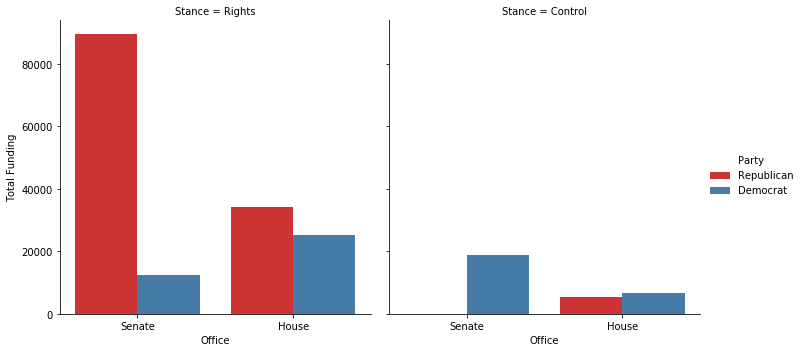

In [22]:
X = 'Office'
y = 'Total Funding'

sns.catplot(X, y, col = 'Stance', hue = 'Party', data = df, kind = 'bar', palette = 'Set1', ci = None)

Alternatively, we could divide the charts into Senate and House of Representatives, with the Congressman's stance on firearm control/rights identified by color.

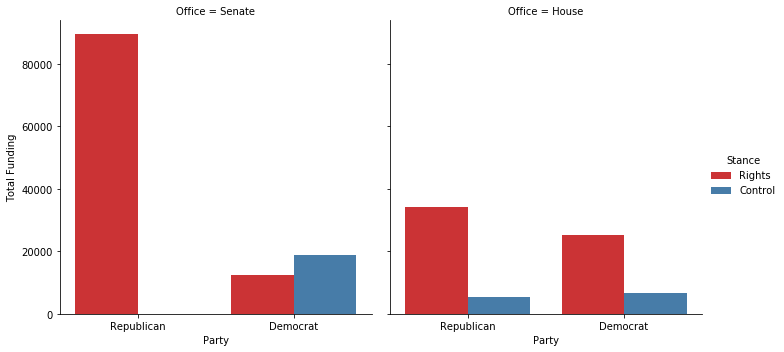

In [23]:
X = 'Party'
y = 'Total Funding'

sns.catplot(X, y, col = 'Office', hue = 'Stance', data = df, kind = 'bar', palette = 'Set1', ci = None)

### Interesting findings

* Republican senators are funded way more by firearm rights lobbyists than those in the House of Representatives. Since the Senate has less people, it's surprising that there is a __higher funding per congressman__ rate for Senators than for Reps. This is probably due to the fact that Senators can overturn a legislation passed by the House (they have more legislative power).

* Some Democrat Senators and Reps are being funded by firearm rights lobbyists! This could mean that the issue with gun control is not necessarily a bilateral issue, but could be a __more deeply rooted issue in American society__.

* Independents are joining in on the conversation. Yay!

* Funding plays a key role in civilian firearm ownership rates

### Future improvements 

1. Add chart title
2. Remove Independents entirely from visualization
3. Refine meaning of 'Undecided' category (i.e. what if they're funded `$`6500 from Rights and `$`5900 from Control?)
4. Use full labels for categories (e.g. Republicans instead of 'R', Senate instead of 'S')
5. Instead of 'Office = S' labels, use 'Senate'. Similar for House of Reps.